#House Price Prediction

---

## Task Description

This notebook presents a comprehensive house price prediction task using a Linear Regression model. It begins with loading and exploring the `house_prices.csv` dataset, followed by data preprocessing, including log-transforming the target 'price' and splitting data into training and testing sets. The model is then trained, and its performance is evaluated using key metrics and a visualization of actual versus predicted prices.


##1. Data Loading

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error


# Configuration for clearer output
pd.set_option('display.max_columns', None)
plt.style.use('ggplot')

# 1. Load Dataset with Error Handling
file_path = 'house_prices.csv'

try:
    df = pd.read_csv(file_path)
    print("✅ Dataset loaded successfully.")
except FileNotFoundError:
    print(f"❌ Error: The file '{file_path}' was not found.")
    print("Please ensure the dataset is in the same directory as this notebook.")


✅ Dataset loaded successfully.


##2. Data Exploration
We will inspect the dataset structure, check for missing values, and review statistical summaries to understand the distribution of our data.

In [ ]:
# Display first 5 rows
print("\n--- Dataset Head ---")
display(df.head())

# Shape of the dataset
print(f"\nDataset Shape: {df.shape}")

# Data Types and Non-Null Counts
print("\n--- Data Info ---")
df.info()

# Missing Value Summary
print("\n--- Missing Values ---")
missing_values = df.isnull().sum()
print(missing_values)

# Statistical Summary
print("\n--- Statistical Summary ---")
display(df.describe())


--- Dataset Head ---


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA



Dataset Shape: (4600, 18)

--- Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  countr

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


##3. Handle Missing Values and Train-Test split


In [ ]:
# The dataset has no missing values to handle

# handle bad values (0s in price)
df = df[df['price'] > 0]

# Identifying Features (X) and Target (y)
X = df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated']]

# log-transform price
df['log_price'] = np.log(df['price'])
y = df['log_price']

# Split the data into Training (80%) and Testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")

Training set size: 3640
Testing set size: 911


##4. Model Training


In [ ]:
# Initialize and Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

print("✅ Model trained successfully.")
print(f"Intercept: {model.intercept_:.2f}")

✅ Model trained successfully.
Intercept: 19.25


##5. Evaluation & Visualization
We predict prices on the test set and calculate:

MAE (Mean Absolute Error): Average absolute difference between actual and predicted prices.

MSE (Mean Squared Error): Penalizes larger errors more heavily.

RMSE (Root Mean Squared Error): Interpretable in the same units as the target (Price).

In [ ]:
# Make Predictions
y_pred = model.predict(X_test)

# Calculate Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("--- Model Performance Metrics ---")
print(f"MAE:  {mae:,.2f}")
print(f"MSE:  {mse:,.2f}")
print(f"RMSE: {rmse:,.2f}")

# Actual prices without log
y_pred_actual = np.exp(y_pred)
y_test_actual = np.exp(y_test)

# Display Sample Predictions with real values
results_df_actual = pd.DataFrame({'Actual': y_test_actual, 'Predicted': y_pred_actual})
results_df_actual['Difference'] = results_df_actual['Actual'] - results_df_actual['Predicted']
print("\n--- Sample Predictions in actual values (First 10) ---")
display(results_df_actual.head(10))

# Display Sample Predictions with log values for better evaluation
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
results_df['Difference'] = results_df['Actual'] - results_df['Predicted']
print("\n--- Sample Predictions in log values (First 10) ---")
display(results_df.head(10))

--- Model Performance Metrics ---
MAE:  0.30
MSE:  0.15
RMSE: 0.39

--- Sample Predictions in actual values (First 10) ---


,Actual,Predicted,Difference
471,1225000.0,1.385809e+06,-160809.013971
2518,496752.0,4.683155e+05,28436.520812
23,612500.0,5.542183e+05,58281.686077
3922,265000.0,3.028038e+05,-37803.784691
135,615000.0,4.200052e+05,194994.755850
1789,432000.0,4.686499e+05,-36649.882548
3335,305000.0,2.981023e+05,6897.739441
2374,405000.0,2.588453e+05,146154.736166
2320,349000.0,4.200700e+05,-71069.970770
3260,839000.0,5.129872e+05,326012.788280



--- Sample Predictions in log values (First 10) ---


,Actual,Predicted,Difference
471,14.018451,14.141795,-0.123343
2518,13.115846,13.056897,0.058949
23,13.325304,13.225314,0.099990
3922,12.487485,12.620840,-0.133355
135,13.329378,12.948022,0.381355
1789,12.976181,13.057611,-0.081430
3335,12.628067,12.605192,0.022875
2374,12.911642,12.463986,0.447657
2320,12.762827,12.948177,-0.185349
3260,13.639966,13.148006,0.491960


## Visualize Results

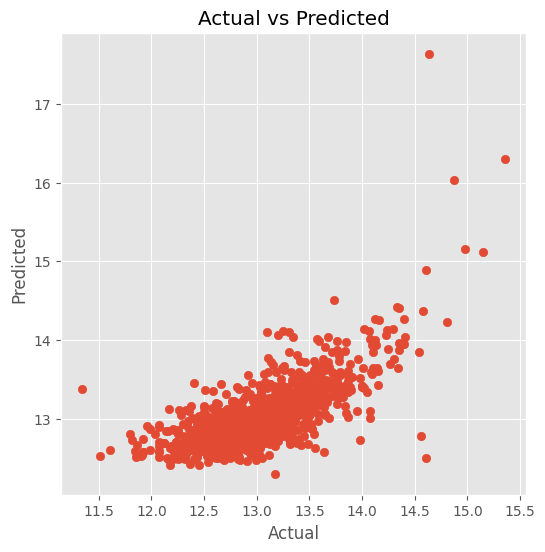

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.show()


## Short Interpretation of Model Performance.
The linear regression model shows reasonable performance after applying a log transformation to the target variable. With an MAE of 0.30 and RMSE of 0.39 in log scale, the model’s predictions are generally within an acceptable proportional error range. When converted back to actual prices, most predictions follow the overall trend of housing prices, though some higher-priced properties show larger absolute errors. This indicates that the model successfully captures general pricing patterns based on numerical features, but its accuracy could be further improved by incorporating additional features such as location and using more advanced regression models.